# Sieć tramwajów we Wrocławiu

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
trams = {
    1: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Piastowska", "Prusa", "Wyszyńskiego", "Nowowiejska", "Słowiańska", "Dworzec Nadodrze", "Trzebnicka", "Broniewskiego", "Kamieńskiego", "Kępińska", "Wołowska", "Poświętne"],
    2: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Reja", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Pułaskiego", "Dworzec Główny", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    3: ["Księże Małe", "Głubczycka", "Karwińska", "Park Wschodni", "Armii Krajowej", "Krakowska (Centrum Handlowe)", "Krakowska", "Na Niskich Łąkach", "Pl. Zgody (Muzeum Etnograficzne)", "Pl. Wróblewskiego", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    4: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Hutmen", "Bzowa (Centrum Historii Zajezdnia)", "Pl. Srebrny", "Stalowa", "Pereca", "Grabiszyńska", "Kolejowa", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Główny", "Pułaskiego", "Kościuszki", "Komuny Paryskiej", "Pl. Wróblewskiego", "Urząd Wojewódzki (Impart)", "Most Grunwaldzki", "Pl. Grunwaldzki", "Kliniki - Politechnika Wrocławska", "Hala Stulecia", "Zoo", "Tramwajowa", "Chełmońskiego", "Piramowicza (Kampus Biskupin)", "Spółdzielcza", "Biskupin"],
    5: ["Księże Małe", "Głubczycka", "Karwińska", "Park Wschodni", "Armii Krajowej", "Krakowska (Centrum Handlowe)", "Krakowska", "Na Niskich Łąkach", "Pl. Zgody (Muzeum Etnograficzne)", "Pl. Wróblewskiego", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Narodowe Forum Muzyki", "Pl. Legionów", "Kolejowa", "Grabiszyńska", "Pereca", "Stalowa", "Pl. Srebrny", "Bzowa (Centrum Historii Zajezdnia)", "Hutmen", "FAT", "Fiołkowa", "Grabiszyńska (Cmentarz)"],
    6: ["Kromera", "Mosty Warszawskie", "Daszyńskiego", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Dubois", "Uniwersytet Wrocławski", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    7: ["Poświętne", "Wołowska", "Kępińska", "Kamieńskiego", "Broniewskiego", "Trzebnicka", "Dworzec Nadodrze", "Paulińska", "Dubois", "Uniwersytet Wrocławski", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki", "Radio I Telewizja", "Przyjaźni", "Braterska", "Sąsiedzka", "Klecina"],
    8: ["Karłowice", "Trzebnicka", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Hala Targowa", "Uniwersytet Wrocławski", "Rynek", "Zamkowa", "Świdnicka", "Park Staromiejski", "Bastion Sakwowy", "Dworzec Główny (Mdk)", "Dworzec Główny", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    9: ["Park Południowy", "Pułtuska", "Weigla (Szpital)", "Jaworowa", "Wiśniowa", "Uniwersytet Ekonomiczny", "Sanocka", "Dworzec Autobusowy", "Dworzec Główny", "Pułaskiego", "Kościuszki", "Komuny Paryskiej", "Pl. Wróblewskiego", "Urząd Wojewódzki (Muzeum Narodowe)", "Katedra", "Ogród Botaniczny", "Górnickiego", "Piastowska", "Grunwaldzka", "Kochanowskiego", "Chopina", "Karłowicza", "Stadion Olimpijski", "8 Maja", "Godebskiego (Awf Wrocław)", "Sępolno"],
    10: ["Biskupin", "Spółdzielcza", "Piramowicza (Kampus Biskupin)", "Chełmońskiego", "Tramwajowa", "Zoo", "Hala Stulecia", "Kliniki - Politechnika Wrocławska", "Pl. Grunwaldzki", "Reja", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    11: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Hutmen", "Bzowa (Centrum Historii Zajezdnia)", "Pl. Srebrny", "Stalowa", "Pereca", "Grabiszyńska", "Kolejowa", "Pl. Legionów", "Narodowe Forum Muzyki", "Zamkowa", "Świdnicka", "Galeria Dominikańska", "Pl. Nowy Targ", "Hala Targowa", "Pl. Bema", "Na Szańcach", "Jedności Narodowej", "Nowowiejska", "Daszyńskiego", "Mosty Warszawskie", "Kromera"],
    12: ["Sępolno", "Godebskiego (Awf Wrocław)", "8 Maja", "Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Bujwida", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "Kolista", "Pilczycka (Anima)", "Modra", "Górnicza"],
    13: ["Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Bujwida", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Rynek", "Pl. Jana Pawła II", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Strzegomski (Muzeum Współczesne)", "Dolmed", "Śrubowa", "Wrocławski Park Przemysłowy", "Park Biznesu", "Babimojska", "Strzegomska 148", "Nowodworska", "Strzegomska (Krzyżówka)", "Rogowska (P+R)", "Rogowska (Ogrody Działkowe)", "Budziszyńska", "Zemska", "Park Tysiąclecia", "Wrocław Nowy Dwór (P+R)"],
    14: ["Osobowice", "Most Milenijny", "Osobowicka (Cmentarz)", "Osobowicka (Cmentarz II)", "Serbska (C.K. Agora)", "Most Osobowicki", "Kleczkowska", "Pl. Staszica", "Pomorska", "Kępa Mieszczańska", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Kolejowa", "Grabiszyńska", "Pereca", "Stalowa", "Pl. Srebrny", "Bzowa (Centrum Historii Zajezdnia)", "Hutmen", "FAT", "Aleja Pracy", "Ojca Beyzyma", "Mielecka", "Gajowicka", "Hallera", "Jastrzębia", "Orla", "Krzyki"],
    15: ["Poświętne", "Wołowska", "Kępińska", "Kamieńskiego", "Bałtycka", "Kleczkowska", "Pl. Staszica", "Pomorska", "Kępa Mieszczańska", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Autobusowy", "Sanocka", "Uniwersytet Ekonomiczny", "Wiśniowa", "Jaworowa", "Weigla (Szpital)", "Pułtuska", "Park Południowy"],
    16: ["Osobowice", "Most Milenijny", "Osobowicka (Cmentarz)", "Osobowicka (Cmentarz II)", "Serbska (C.K. Agora)", "Most Osobowicki", "Kleczkowska", "Pl. Staszica", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Wyszyńskiego", "Prusa", "Piastowska", "Pl. Grunwaldzki", "Most Grunwaldzki", "Urząd Wojewódzki (Impart)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Hubska (Dawida)", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    17: ["Sępolno", "Godebskiego (Awf Wrocław)", "8 Maja", "Stadion Olimpijski", "Karłowicza", "Chopina", "Kochanowskiego", "Grunwaldzka", "Piastowska", "Górnickiego", "Ogród Botaniczny", "Pl. Bema", "Hala Targowa", "Pl. Nowy Targ", "Galeria Dominikańska", "Świdnicka", "Zamkowa", "Narodowe Forum Muzyki", "Renoma", "Arkady (Capitol)", "Zaolziańska", "Wielka", "Rondo", "Sztabowa", "Hallera", "Jastrzębia", "Orla", "Krzyki", "Radio I Telewizja", "Przyjaźni", "Braterska", "Sąsiedzka", "Klecina"],
    18: ["Tarczyński Arena (Królewiecka)", "Dworska", "Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Mosty Pomorskie", "Rynek", "Narodowe Forum Muzyki", "Renoma", "Opera", "Park Staromiejski", "Bastion Sakwowy", "Dworzec Główny (Mdk)", "Dworzec Główny", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Krynicka", "Morwowa", "Świeradowska", "Gaj"],
    19: ["Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Dubois", "Pl. Bema", "Ogród Botaniczny", "Górnickiego", "Piastowska", "Pl. Grunwaldzki", "Kliniki - Politechnika Wrocławska", "Hala Stulecia", "Zoo"],
    20: ["Oporów", "Grabiszyńska (Cmentarz II)", "Grabiszyńska (Cmentarz)", "Fiołkowa", "FAT", "Aleja Pracy", "Ojca Beyzyma", "Mielecka", "Gajowicka", "Hallera", "Sztabowa", "Rondo", "Wielka", "Zaolziańska", "Arkady (Capitol)", "Renoma", "Pl. Orląt Lwowskich", "Dworzec Świebodzki", "Smolecka", "Śrubowa", "Dolmed", "Wrocław Mikołajów (Zachodnia)", "Niedźwiedzia", "Małopanewska", "Kwiska", "DH Astra", "Park Zachodni", "Bajana", "Metalowców", "Pilczyce", "Tarczyński Arena (Lotnicza)", "Glinianki", "Aleja Architektów", "Grabowa", "Kosmonautów", "Kosmonautów (Szpital)", "Kamiennogórska (Ośrodek Dla Niewidomych)", "Złotnicka", "Wschowska", "Jeleniogórska", "Leśnica"],
    21: ["Tarczyński Arena (Królewiecka)", "Dworska", "Górnicza", "Modra", "Pilczycka (Anima)", "Kolista", "Kwiska", "Małopanewska", "Niedźwiedzia", "Wrocław Mikołajów (Zachodnia)", "Pl. Strzegomski (Muzeum Współczesne)", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Autobusowy", "Joannitów", "Gajowa", "Prudnicka", "Kamienna", "Bardzka", "Krynicka", "Morwowa", "Świeradowska", "Gaj"],
    22: ["Pilczyce", "Metalowców", "Bajana", "Park Zachodni", "DH Astra", "Kwiska", "Małopanewska", "Niedźwiedzia", "Wrocław Mikołajów (Zachodnia)", "Pl. Strzegomski (Muzeum Współczesne)", "Młodych Techników Akademia Sztuk Teatralnych", "Pl. Jana Pawła II", "Pl. Orląt Lwowskich", "Pl. Legionów", "Arkady (Capitol)", "Dworzec Główny", "Pułaskiego", "Hubska (Dawida)", "Prudnicka", "Kamienna", "Bardzka", "Nyska", "Tarnogajska", "Klimasa", "Tarnogaj"],
    23: ["Kowale", "Bociania", "Gęsia", "Kwidzyńska", "Kętrzyńska", "Kromera", "Mosty Warszawskie", "Daszyńskiego", "Nowowiejska", "Jedności Narodowej", "Na Szańcach", "Pl. Bema", "Ogród Botaniczny", "Katedra", "Urząd Wojewódzki (Muzeum Narodowe)", "Pl. Wróblewskiego", "Komuny Paryskiej", "Kościuszki", "Pułaskiego", "Dworzec Główny", "Arkady (Capitol)", "Pl. Legionów", "Pl. Orląt Lwowskich", "Dworzec Świebodzki", "Smolecka", "Śrubowa", "Wrocławski Park Przemysłowy", "Park Biznesu", "Babimojska", "Strzegomska 148", "Nowodworska", "Strzegomska (Krzyżówka)", "Rogowska (P+R)", "Rogowska (Ogrody Działkowe)", "Budziszyńska", "Zemska", "Park Tysiąclecia", "Wrocław Nowy Dwór (P+R)"],
    24: ["Pilczyce", "Metalowców", "Bajana", "Park Zachodni", "DH Astra", "Wejherowska (Hala Orbita)", "Port Popowice", "Białowieska", "Park Popowicki", "Wrocław Popowice (17.Południk)", "Długa (Ogrody Działkowe)", "Wrocław Szczepin", "Michalczyka", "Kępa Mieszczańska", "Pomorska", "Pl. Staszica", "Dworzec Nadodrze", "Słowiańska", "Nowowiejska", "Daszyńskiego", "Mosty Warszawskie", "Kromera", "Kętrzyńska", "Kwidzyńska", "Gęsia", "Bociania", "Kowale"]
}

**Linie tymczasowe**: 2, 5, 8, 9, 17, 18, 23

Obliczamy wagi krawędzi

In [3]:
edge_weights = defaultdict(int)

for line, stops in trams.items():
    for i in range(len(stops) - 1):
        a, b = stops[i], stops[i+1]
        edge = tuple(sorted((a, b)))
        edge_weights[edge] += 1

In [4]:
G = nx.Graph()

for (a, b), weight in edge_weights.items():
    G.add_edge(a, b, weight=weight)

print(f"Liczba przystanków: {G.number_of_nodes()}")
print(f"Liczba połączeń: {G.number_of_edges()}")

Liczba przystanków: 197
Liczba połączeń: 225


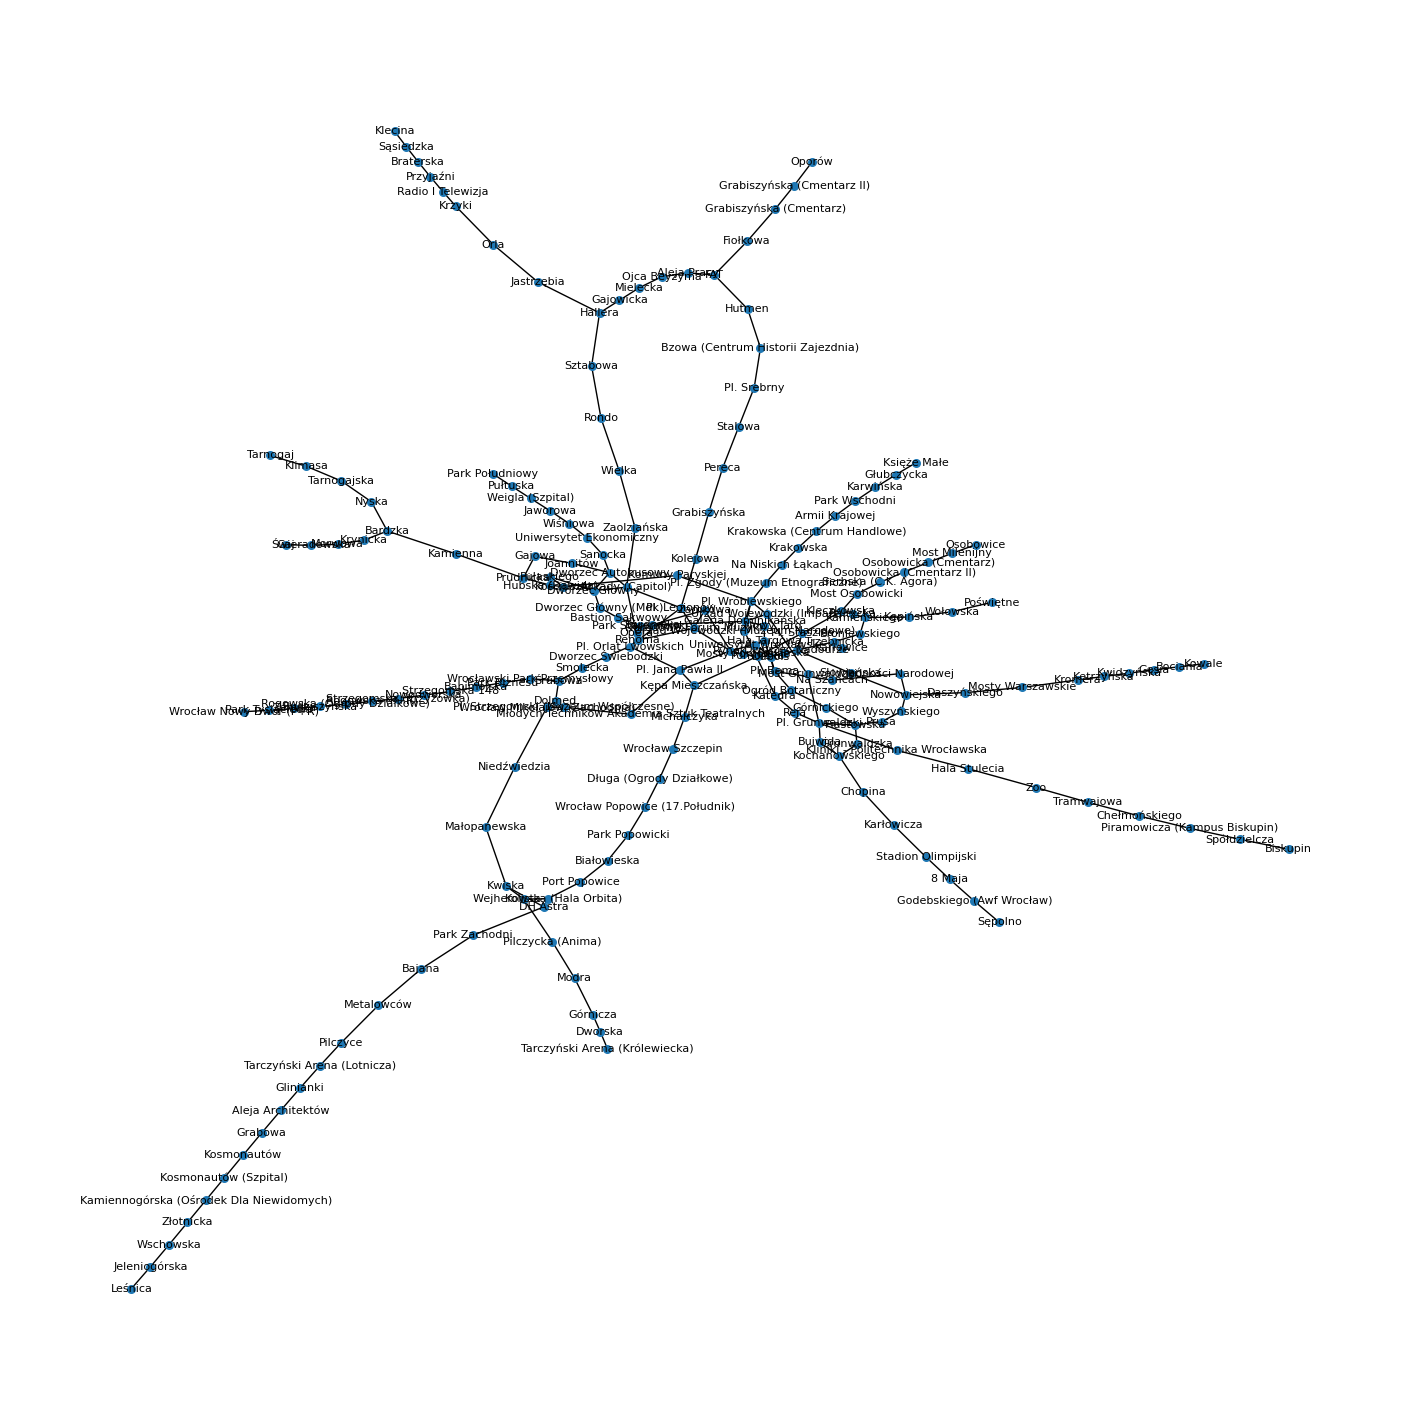

In [5]:
plt.figure(figsize=(14, 14))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True, node_size=30, font_size=8)
plt.show()

# Teraz trzeba poprawić layout